<!-- The aim of the analysis is to come up with a model which can be used by the bank in identifying the potential customers who would be willingly to opt for the term deposit offered by the bank. In order to build such a model, the follwoing steps have been followed : -->

# Bank's Term Deposit Opt-in Marketing Campaign

### Data Science Method

1. Problem Identification
2. Data Wrangling
3. Exploratory Data Analysis
4. Pre-processing and Training Data Development
5. Modeling
6. Documentation

bank_data.columns


In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings
warnings.filterwarnings("ignore")

In [14]:
plt.style.use('dark_background')
c = ['white', 'springgreen', 'fuchsia', 'lightcoral', 'red'] # Color
s = [24, 20, 16, 12]  # Size
w = [0.75, 1, 1.25, 1.50] # Line Width
ga = 0.10 # Grid Alpha

## Problem Identification

The purpose of this analysis is to produce a clear result of the previous marketing campaigns as we have had customers whe opt in for our term deposit offered by the bank. 

What is a Term Deposit?
https://www.investopedia.com/terms/t/termdeposit.asp

## Data Wrangling

In [15]:
# prints current directory
current_dir = os.getcwd()
print("Current Directory: ")
print(current_dir)

Current Directory: 
/Users/jb/Development/courses/springboard/ds/Assignments/SB-Projects/Case_Studies/case-study-banking-deposit


In [16]:
# prints parent directory
project_dir = os.path.abspath(os.path.join(os.path.join(current_dir, os.pardir), os.pardir))
print("Parent Directory: ")
print(project_dir)

Parent Directory: 
/Users/jb/Development/courses/springboard/ds/Assignments/SB-Projects


In [17]:
bank_data = pd.read_csv("datasets/bank.csv")
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [18]:
bank_data.shape

(11162, 17)

In [19]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [20]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


## Exploratory Data Analysis

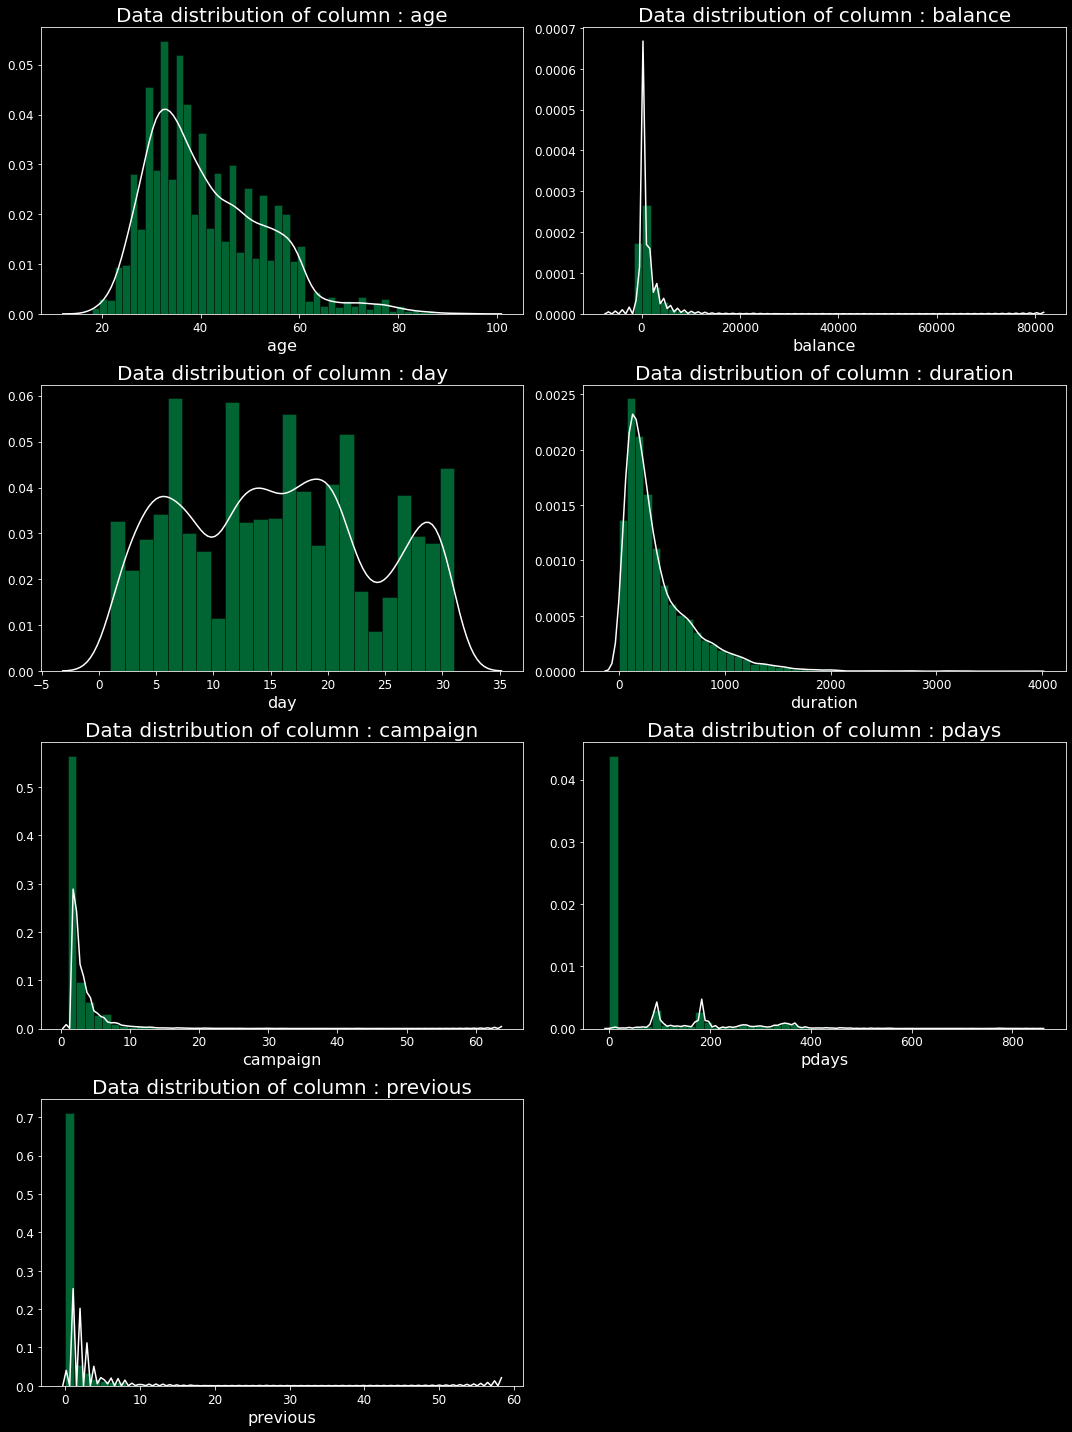

In [50]:
fig = plt.figure(figsize = [15,20])
cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
cnt = 1
for col in cols :
    
    ax = plt.subplot(4,2,cnt)
    
    sns.distplot(bank_data[col], hist_kws=dict(edgecolor="k", linewidth=1, color=c[1]), color=c[0])
    
    plot_name = "Data distribution of column : " + col
    ax.set_title(plot_name, fontsize = s[1])
    plt.xlabel(col, fontsize=s[2])
    ax.tick_params(axis='both', labelsize=s[3])

    
    cnt += 1

plt.tight_layout()
plt.show() 


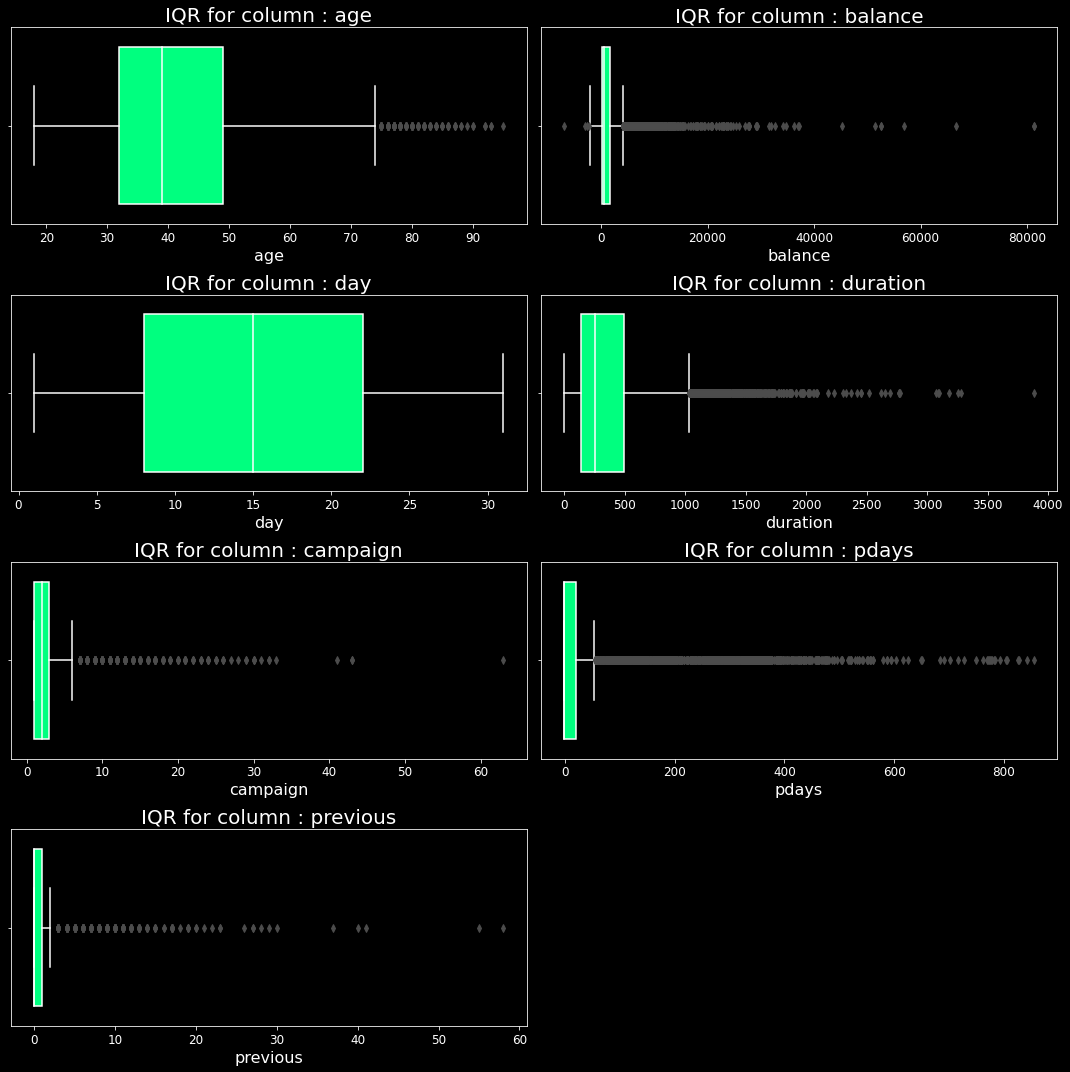

In [55]:
fig = plt.figure(figsize = [15,15])
cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
cnt = 1
for col in cols :
    ax = plt.subplot(4, 2, cnt)
    sns.boxplot(bank_data[col], color=c[1])


    plot_name = "IQR for column : " + col
    ax.set_title(plot_name, fontsize = s[1])
    plt.xlabel(col, fontsize=s[2])
    ax.tick_params(axis='both', labelsize=s[3])

    cnt+=1


    # iterate over boxes
    for i,box in enumerate(ax.artists):
        box.set_edgecolor(c[0])
        box.set_facecolor(c[1])

        # iterate over whiskers and median lines
        for j in range(6*i,6*(i+1)):
             ax.lines[j].set_color(c[0])

plt.tight_layout()
plt.show() 